In [1]:
# read the text file programmatically
# filter the complete the sentences (you will get like 6000 approx number of complete sentences)
# select 50 setences randomly out of 6000 sentences
# print those 50 sentences here
# do manually analysis to find indicative features/words


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice
import sys
import torch
import torch.nn as nnll performance summary =  0.48383582711223ll performance summary =  0.483ll performance summary =  0.4838358271122383582711223
import torch.nn.functional as F


vectorizer = None

In [3]:
def read_file(file_path):
    
    df = pd.read_csv(file_path, sep = '\t')
    df.head()
    return dfll performance summary =  0.48383582711223


In [4]:
def get_sentences_and_sentiments(df):
    counter = 0 
    Id = 1
    list_of_sentences = []
    word_in_sent = []
    list_of_sentiments = []
    for num in range(len(df['SentenceId'])):

        #if Id == df['SentenceId'][counter]:
        list_of_sentences.append(df['Phrase'][num])
        list_of_sentiments.append(df['Sentiment'][num])

            #print(str(Id) + ") " + df['Phrase'][counter] + str(df['Sentiment'][counter]) +"\n")
            #Id = Id + 1 
        #counter = counter + 1 
    #print(list_of_sentences)
    #print(list_of_sentiments) 

    y = np.array(list_of_sentiments)
    print(y)
    return list_of_sentences, y

In [5]:
def split_data(list_of_sentences,y):
    train_list_of_sentence = []
    test_list_of_sentence = []
    split_index = int(len(list_of_sentences)*0.2)
    #length_to_split = [int(len(list_of_sentences)*0.8), int(len(list_of_sentences)*0.2)]
    #sen = iter(list_of_sentences)
    #sentences = [list(islice(sen,elem))
    #            for elem in length_to_split]
    #print(sentences)
    print("list of sentences " , len(list_of_sentences))
    print("Slpit_index", split_index)
    train_list_of_sentence = list_of_sentences[ :-split_index]

    test_list_of_sentence = list_of_sentences[-split_index: ]

    print(len(test_list_of_sentence))
    
    y_train=y[ :-split_index]
    y_test = y[-split_index: ]
    print("y_train", len(y_train))
    print("y_test", len(y_test))
    return train_list_of_sentence, test_list_of_sentence,y_test,y_train

In [6]:
def convert_sentence_to_vector(sentences): #,test_list_of_sentence):
    global vectorizer
    
    if vectorizer == None:
        vectorizer = CountVectorizer()
        vectorizer.fit(sentences)
    else:
        pass
    
    X_vec = vectorizer.transform(sentences)
    
    '''print(X_train.shape)
    print(type(X_train))
    X_train_dense = X_train.todense()ll performance summary =  0.48383582711223
    print(X_train_dense.shape)

    print(sys.getsizeof(X_train_dense))
    print(X_train_dense[10].tolist())'''
    return X_vec

In [7]:
def train_classifier(X_train,y_train):
    reg = LogisticRegression().fit(X_train, y_train)
    return reg
def prediction(reg, X_test):
    predections = reg.predict(X_test)
    print("prediction", predections.shape)
    return predections

def evulate(predections, y_test):
    score = accuracy_score(y_test, predections)
    return score

In [8]:
data = read_file("/home/nidhi/Projects_Jupyter_Notebook/Movie_sentiments_classifier/train.tsv")
all_sentences, all_sentiments = get_sentences_and_sentiments(data)
print(len(all_sentences))
X_train, X_test, y_test, y_train = split_data(all_sentences,all_sentiments)
vector_train = convert_sentence_to_vector(X_train)
print("y_train", len(y_train))
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_test", len(y_test))
vector_test = convert_sentence_to_vector(X_test)
clf = train_classifier(vector_train, y_train)
pre = prediction(clf,vector_test)
evu = evulate(pre, y_test)
print(evu)

[1 2 2 ... 3 2 2]
156059
list of sentences  156059
Slpit_index 31211
31211
y_train 124848
y_test 31211
y_train 124848
X_train 124848
X_test 31211
y_test 31211


/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction (31211,)
0.5829355035083784


In [9]:
import pickle
import nltk
from nltk.tokenize import word_tokenize
import numpy


In [10]:
word_to_index = pickle.load(open("/home/nidhi/Projects_Jupyter_Notebook/PycharmProjects/practice_glove/word_index.pkl", "rb"))
word_to_index['OoV'] = len(word_to_index)
glove_embeddings = pickle.load(open("/home/nidhi/Projects_Jupyter_Notebook/PycharmProjects/practice_glove/glove_lookup_matrix.pkl", "rb"))
print(glove_embeddings.shape)

numpy.random.seed(56)
OoV_vector = numpy.random.rand(100)
glove_embeddings = numpy.vstack([glove_embeddings, OoV_vector])
print(glove_embeddings.shape)    



(400000, 100)
(400001, 100)


In [11]:
def convert_sent_to_index(sentence):
    var_index = []
    words = word_tokenize(sentence)
    for word in words:
        word = word.lower()
        
        if word_to_index.get(word) == None:
            var_index.append(word_to_index['OoV'])
        else:
            var_index.append(word_to_index.get(word))
    return var_index

In [12]:
class movie_sentiments_one_layer(nn.Module):
    
    def __init__(self, in_features=100, h1 = 100, out_features = 5):
        
        super(movie_sentiments_one_layer, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.out = nn.Linear(h1, out_features)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.embedding = nn.Embedding.from_pretrained(torch.from_numpy(glove_embeddings))
    
    def forward(self,x_sentences):
        x_vectors = []
        
        for sentence in x_sentences:
            x_indices = convert_sent_to_index(sentence)
            x_matrix = self.embedding(torch.from_numpy(numpy.array(x_indices)).long())
            x_vector = torch.sum(x_matrix, dim=0).reshape(1,100)
            x_vectors.append(x_vector)
        
                
        x_vectors = torch.cat(x_vectors, dim=0).float()
        h1 = F.relu(self.fc1(x_vectors))
        out = self.out(h1)
        out = self.sigmoid(out)
        out = self.softmax(out)
        
        return out
        

In [13]:
model = movie_sentiments_one_layer()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
epochs = 10 
losses = []

for i in range(epochs):
    
    # Forward and get a prediction 
    
    y_pred = model.forward(X_train)
    
    # Calculate Loss/error
    
    loss = criterion(y_pred,torch.from_numpy(numpy.array(y_train)))
    losses.append(loss)
    
    #if i % 10 ==0:
    print(f'epoch {i} and loss is {loss}')
        
        
    #Backpropogation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/nidhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 and loss is 1.6061348915100098
epoch 1 and loss is 1.6013691425323486
epoch 2 and loss is 1.5967177152633667
epoch 3 and loss is 1.5923799276351929
epoch 4 and loss is 1.5884723663330078
epoch 5 and loss is 1.5849807262420654
epoch 6 and loss is 1.581884503364563
epoch 7 and loss is 1.5791338682174683
epoch 8 and loss is 1.5766700506210327
epoch 9 and loss is 1.5744224786758423


Text(0.5, 0, 'Epoch')

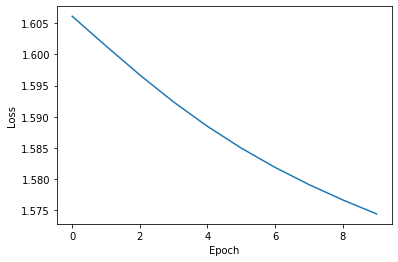

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [16]:
with torch.no_grad():
        y_val = model.forward(X_test)
        y_pred = numpy.argmax(y_val.numpy(), axis=1)

/home/nidhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


print("Per class performance summary = " , f1_score(y_test, y_pred, average = 'macro'))
print("Over all performance summary = ",f1_score(y_test, y_pred, average = 'micro'))

print("Classificaion Report: ",classification_report(y_test, y_pred))

Per class performance summary =  0.1380910316922874
Over all performance summary =  0.483835827112236
Classificaion Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00      1443
           1       0.23      0.00      0.00      5918
           2       0.49      0.97      0.65     15362
           3       0.21      0.02      0.03      6605
           4       0.00      0.00      0.00      1883

    accuracy                           0.48     31211
   macro avg       0.19      0.20      0.14     31211
weighted avg       0.33      0.48      0.33     31211



In [18]:
'''words = []
f = open('/home/nidhi/words.txt').readlines()

for word in f:
    word.strip()
    words.append(word.strip())'''

"words = []\nf = open('/home/nidhi/words.txt').readlines()\n\nfor word in f:\n    word.strip()\n    words.append(word.strip())"

In [19]:
'''counter = 0 
Id = 1
list_of_sentences = []
word_in_sent = []
list_of_sentiments = []
for num in range(len(df['SentenceId'])):
    
    if Id == df['SentenceId'][counter]:
        list_of_sentences.append(df['Phrase'][counter])
        list_of_sentiments.append(df['Sentiment'][counter])
        
        #print(str(Id) + ") " + df['Phrase'][counter] + str(df['Sentiment'][counter]) +"\n")
        Id = Id + 1 
    counter = counter + 1 
#print(list_of_sentences)
#print(list_of_sentiments) 

y = np.array(list_of_sentiments)
print(y)




#print(words)

#l = len(list_of_sentences)

for i in words:
    vector = []
    for sent in list_of_sentences:
        if i in sent:
            j = 1
            vector.append(j)
            
        else:
            j = 0
            vector.append(j)
        
    word_in_sent.append(vector)  
X = np.array(word_in_sent).T
print(X.shape)'''
#print(X)
        
#print(word_in_sent)
    
#print (Id)
#print(counter)
#print(list_of_sentences)

#for i in range(len(list_of_sentences)):
    #print(str(i) + "\t" +list_of_sentences[i] + "\n")
    




'counter = 0 \nId = 1\nlist_of_sentences = []\nword_in_sent = []\nlist_of_sentiments = []\nfor num in range(len(df[\'SentenceId\'])):\n    \n    if Id == df[\'SentenceId\'][counter]:\n        list_of_sentences.append(df[\'Phrase\'][counter])\n        list_of_sentiments.append(df[\'Sentiment\'][counter])\n        \n        #print(str(Id) + ") " + df[\'Phrase\'][counter] + str(df[\'Sentiment\'][counter]) +"\n")\n        Id = Id + 1 \n    counter = counter + 1 \n#print(list_of_sentences)\n#print(list_of_sentiments) \n\ny = np.array(list_of_sentiments)\nprint(y)\n\n\n\n\n#print(words)\n\n#l = len(list_of_sentences)\n\nfor i in words:\n    vector = []\n    for sent in list_of_sentences:\n        if i in sent:\n            j = 1\n            vector.append(j)\n            \n        else:\n            j = 0\n            vector.append(j)\n        \n    word_in_sent.append(vector)  \nX = np.array(word_in_sent).T\nprint(X.shape)'

In [20]:
'''train_list_of_sentence = []
test_list_of_sentence = []
length_to_split = [2097,530]
sen = iter(list_of_sentences)
sentences = [list(islice(sen,elem))
            for elem in length_to_split]
#print(sentences)
train_list_of_sentence = sentences[0]

test_list_of_sentence = sentences[1]

print(len(test_list_of_sentence))'''



'train_list_of_sentence = []\ntest_list_of_sentence = []\nlength_to_split = [2097,530]\nsen = iter(list_of_sentences)\nsentences = [list(islice(sen,elem))\n            for elem in length_to_split]\n#print(sentences)\ntrain_list_of_sentence = sentences[0]\n\ntest_list_of_sentence = sentences[1]\n\nprint(len(test_list_of_sentence))'

In [21]:
#print(len(list_of_sentences), len(list_of_sentiments))

In [22]:
#train_data = np.array(word_in_sent)
#n = train_data.shape
#print(n)

In [23]:
#print(word_in_sent[0])

In [24]:
#import random 

#for i in range(1,101):
#    print(str(i) +"\t" + random.choice(list_of_sentences) + "\n")


In [25]:
'''vectorizer = CountVectorizer()
vectorizer.fit(train_list_of_sentence)
X_train = vectorizer.transform(train_list_of_sentence)
print(X_train.shape)
print(type(X_train))
X_train_dense = X_train.todense()
print(X_train_dense.shape)

print(sys.getsizeof(X_train_dense))
print(X_train_dense[10].tolist())'''

'vectorizer = CountVectorizer()\nvectorizer.fit(train_list_of_sentence)\nX_train = vectorizer.transform(train_list_of_sentence)\nprint(X_train.shape)\nprint(type(X_train))\nX_train_dense = X_train.todense()\nprint(X_train_dense.shape)\n\nprint(sys.getsizeof(X_train_dense))\nprint(X_train_dense[10].tolist())'

In [26]:
'''X_test = vectorizer.transform(sentences[1])
print(X_test.shape)'''


'X_test = vectorizer.transform(sentences[1])\nprint(X_test.shape)'

In [27]:
'''y_train=y[ :-530]
y_test = y[-530: ]
print(len(y_train))
print(len(y_test))'''

'y_train=y[ :-530]\ny_test = y[-530: ]\nprint(len(y_train))\nprint(len(y_test))'

In [28]:
'''reg = LogisticRegression(). activation function.fit(X_train, y_train)
predections = reg.predict(X_test)
print(predections.shape)
predections[:10]
accuracy_score(y_test, predections)'''

'reg = LogisticRegression().fit(X_train, y_train)\npredections = reg.predict(X_test)\nprint(predections.shape)\npredections[:10]\naccuracy_score(y_test, predections)'